<h3><b>Importing required dependencies</b></h3>

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import pickle #for saving history object

from sklearn.metrics import confusion_matrix, classification_report, f1_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import numpy as np
from tensorflow.keras.models import load_model


<h3><b>Data Preprocessing</b></h3>

In [2]:
# Define directories and hyperparameters
train_dir =r'D:\testproject\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train'
val_dir = r'D:\testproject\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\valid'
test_dir=r'D:\testproject\New Plant Diseases Dataset(Augmented)\test\test'


[[[170 153 161]
  [171 154 162]
  [171 154 162]
  ...
  [168 149 155]
  [170 151 157]
  [180 161 167]]

 [[163 146 154]
  [167 150 158]
  [172 155 163]
  ...
  [154 135 141]
  [159 140 146]
  [163 144 150]]

 [[158 141 149]
  [165 148 156]
  [173 156 164]
  ...
  [168 149 155]
  [169 150 156]
  [187 168 174]]

 ...

 [[168 152 163]
  [171 155 166]
  [174 158 169]
  ...
  [176 158 170]
  [175 157 169]
  [184 166 178]]

 [[165 149 160]
  [169 153 164]
  [174 158 169]
  ...
  [145 127 139]
  [115  97 109]
  [173 155 167]]

 [[161 145 156]
  [166 150 161]
  [171 155 166]
  ...
  [143 125 137]
  [169 151 163]
  [170 152 164]]]
(256, 256, 3)


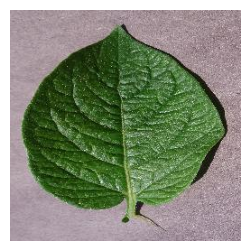

In [3]:
image_path = r'D:\testproject\New Plant Diseases Dataset(Augmented)\New Plant Diseases Dataset(Augmented)\train\Potato___healthy\750584fd-72e0-45c8-b37c-97208bd559cc___RS_HL 1885_flipLR.JPG'
# Read the image
img = plt.imread(image_path)
print(img)
print(img.shape)
plt.figure(figsize=(3,3))
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [4]:
# Image and train parameters
img_size = (224, 224)
batch_size = 16
epochs = 20
patience = 5

<h3><b>Splitting of Data for Train, Validation & Test</b></h3>

In [5]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 12750 images belonging to 17 classes.
Found 7809 images belonging to 17 classes.
Found 468 images belonging to 17 classes.


<h3><b>Building AlexNet Model</b></h3>

In [6]:
# Building the AlexNet Model
model = Sequential([
    Conv2D(96, kernel_size=(11,11), strides=(4,4), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(256, kernel_size=(5,5), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(384, kernel_size=(3,3), activation='relu'),
    Conv2D(256, kernel_size=(3,3), activation='relu'),
    MaxPooling2D(pool_size=(3,3), strides=(2,2)),
    Flatten(),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(4096, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


In [7]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='categorical_crossentropy', metrics=['accuracy'])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 384)         885120    
                                                                 
 conv2d_3 (Conv2D)           (None, 6, 6, 384)         1

In [9]:
#Define callbacks
checkpoint = ModelCheckpoint("../models/alexnet(copy)_plant_disease_detection.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience=patience, verbose=1, restore_best_weights=True)

<h3><b>Model Training</b></h3>

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,
    epochs=epochs,
    validation_data=val_generator,
    validation_steps=val_generator.samples // batch_size,
    callbacks=[checkpoint, early_stopping]
)

# Save history object
with open('history[alexnet(copy)2024].pkl', 'wb') as f:
    pickle.dump(history.history, f)

# Load history object
with open('history[alexnet(copy)2024].pkl', 'rb') as f:
    loaded_history = pickle.load(f)

Epoch 1/20
796/796 [==============================] - ETA: 0s - loss: 2.5286 - accuracy: 0.1546
Epoch 1: val_accuracy improved from -inf to 0.23156, saving model to ../models\alexnet(copy)_plant_disease_detection.h5
796/796 [==============================] - 137s 163ms/step - loss: 2.5286 - accuracy: 0.1546 - val_loss: 2.2803 - val_accuracy: 0.2316
Epoch 2/20
796/796 [==============================] - ETA: 0s - loss: 2.0650 - accuracy: 0.2776
Epoch 2: val_accuracy improved from 0.23156 to 0.43724, saving model to ../models\alexnet(copy)_plant_disease_detection.h5
796/796 [==============================] - 127s 160ms/step - loss: 2.0650 - accuracy: 0.2776 - val_loss: 1.6753 - val_accuracy: 0.4372
Epoch 3/20
796/796 [==============================] - ETA: 0s - loss: 1.5878 - accuracy: 0.4421
Epoch 3: val_accuracy improved from 0.43724 to 0.55648, saving model to ../models\alexnet(copy)_plant_disease_detection.h5
796/796 [==============================] - 125s 157ms/step - loss: 1.5878 - 

<h3><b>Evaluation of Model</b></h3>

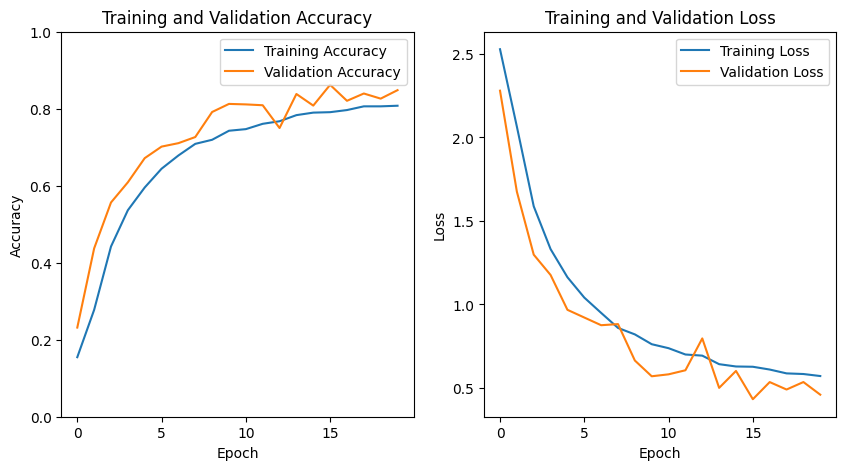

In [11]:
# Evaluation of Model
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend()
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(loaded_history['loss'], label='Training Loss')
plt.plot(loaded_history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()

In [6]:
model =load_model('../models/alexnet(copy)_plant_disease_detection.h5')

30/30 [==============================] - 1s 43ms/step
There were 55 errors in 468 tests for an accuracy of 88.25


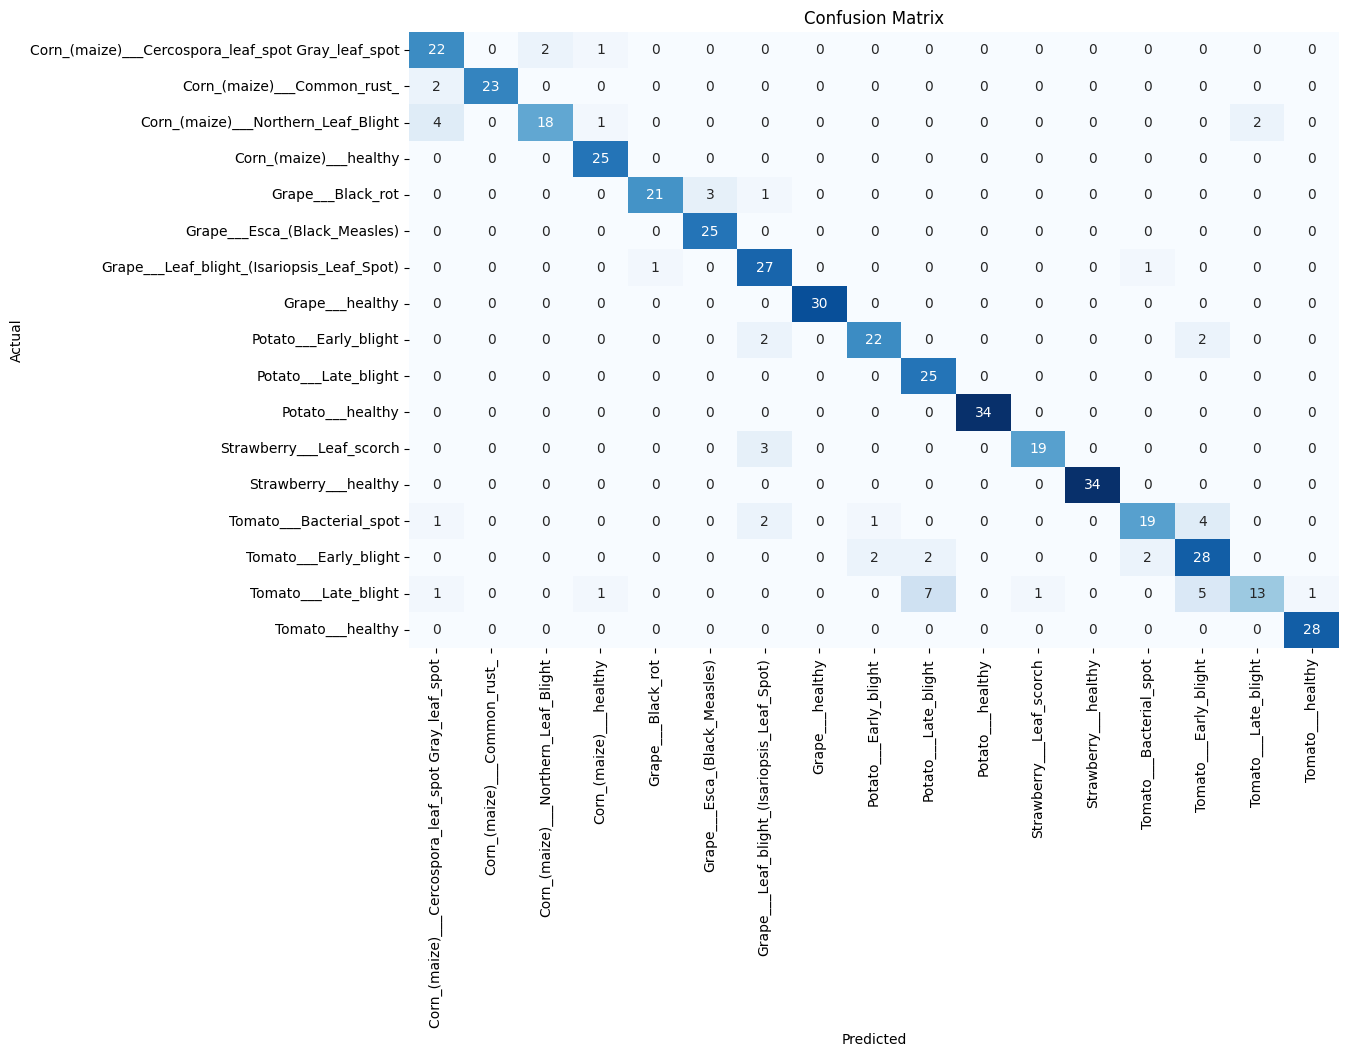

Classification Report:
----------------------
                                                     precision    recall  f1-score   support

Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot     0.7333    0.8800    0.8000        25
                       Corn_(maize)___Common_rust_     1.0000    0.9200    0.9583        25
               Corn_(maize)___Northern_Leaf_Blight     0.9000    0.7200    0.8000        25
                            Corn_(maize)___healthy     0.8929    1.0000    0.9434        25
                                 Grape___Black_rot     0.9545    0.8400    0.8936        25
                      Grape___Esca_(Black_Measles)     0.8929    1.0000    0.9434        25
        Grape___Leaf_blight_(Isariopsis_Leaf_Spot)     0.7714    0.9310    0.8438        29
                                   Grape___healthy     1.0000    1.0000    1.0000        30
                             Potato___Early_blight     0.8800    0.8462    0.8627        26
                              Po

In [9]:
def predictor(test_gen):    
    y_pred = []
    error_list = []
    error_pred_list = []
    y_true = test_gen.labels
    classes = list(test_gen.class_indices.keys())
    class_count = len(classes)
    errors = 0
    preds = model.predict(test_gen, verbose=1)
    tests = len(preds)    
    for i, p in enumerate(preds):        
        pred_index = np.argmax(p)         
        true_index = test_gen.labels[i]  # labels are integer values        
        if pred_index != true_index: # a misclassification has occurred                                           
            errors = errors + 1
            file = test_gen.filenames[i]
            error_list.append(file)
            error_class = classes[pred_index]
            error_pred_list.append(error_class)
        y_pred.append(pred_index)
            
    acc = (1 - errors/tests) * 100
    msg = f'There were {errors} errors in {tests} tests for an accuracy of {acc:.2f}'
    print(msg)
    
    ypred = np.array(y_pred)
    ytrue = np.array(y_true)
    f1score = f1_score(ytrue, ypred, average='weighted') * 100
    if class_count <= 30:
        cm = confusion_matrix(ytrue, ypred)
        # plot the confusion matrix
        plt.figure(figsize=(12, 8))
        sns.heatmap(cm, annot=True, vmin=0, fmt='g', cmap='Blues', cbar=False)       
        plt.xticks(np.arange(class_count) + .5, classes, rotation=90)
        plt.yticks(np.arange(class_count) + .5, classes, rotation=0)
        plt.xlabel("Predicted")
        plt.ylabel("Actual")
        plt.title("Confusion Matrix")
        plt.show()
    
    clr = classification_report(y_true, y_pred, target_names=classes, digits=4) # create classification report
    print("Classification Report:\n----------------------\n", clr)
    
    return errors, tests, error_list, error_pred_list, f1score, y_pred, y_true

errors, tests, error_list, error_pred_list, f1score, y_pred, y_true = predictor(test_generator)

In [ ]:
# Evaluate the model on test data
test_loss, test_acc = model.evaluate(test_generator, verbose=2)
print('/nTest accuracy:', test_acc)
print('Test Loss:', test_loss)

In [13]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [14]:
# Save class indices to a JSON file
with open('class_indices_alexnet(copy).json', 'w') as f:
    json.dump(class_indices, f)

NameError: name 'json' is not defined